<a href="https://colab.research.google.com/github/TrynowPht/MachineLearning/blob/master/TP_MachinLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#@title Importación de Librerías
from ipywidgets import FileUpload
import pandas as pd
import missingno as msno
import seaborn as sns
%matplotlib inline

### Lectura de la Data

In [4]:
DataSet = FileUpload()
DataSet

FileUpload(value={}, description='Upload')

In [5]:
with open('datos_banco.csv', "wb") as fp:
    fp.write(DataSet.data[0])
df = pd.read_csv("datos_banco.csv", engine='python')
df.head(5)

,idPrestamo,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term,default_request_amount
0,LIBDISP9832897855,1,252.39,9.0,"1,200",6,289.11,1140.125000,MALE,C,NORMAL,Secundaria,1,0
1,LIBDISP9021501745,1,244.57,50.0,"2,200",12,696.15,1061.375000,FEMALE,S,NORMAL,Secundaria,0,0
2,LIBDISP4057314971,0,491.5,64.0,"1,000",3,84.99,2082.196667,FEMALE,S,NORMAL,Secundaria,0,0
3,LIBDISP8375185888,0,848.65,77.0,"1,500",6,221.53,3422.423333,MALE,S,NORMAL,Universitaria,0,0
4,LIBDISP9694463037,0,470.52,82.0,"1,000",3,91.34,1882.090000,FEMALE,S,NORMAL,Universitaria,1,0


# 1. Análisis Exploratorio

## 1.1 Cantidad de variables y atributos

In [6]:
print('Cantidad de instancias:',df.shape[0])
print('Cantidad de atributos:',df.shape[1])

Cantidad de instancias: 1719
Cantidad de atributos: 14


## 1.2 Valores nulos

En el siguiente gráfico podemos ver la existencia de valores nulos a lo largo de cada instancia, como resultado podemos observar que solo el atributo ***var_employment_time_in_month*** contiene valores nulos.

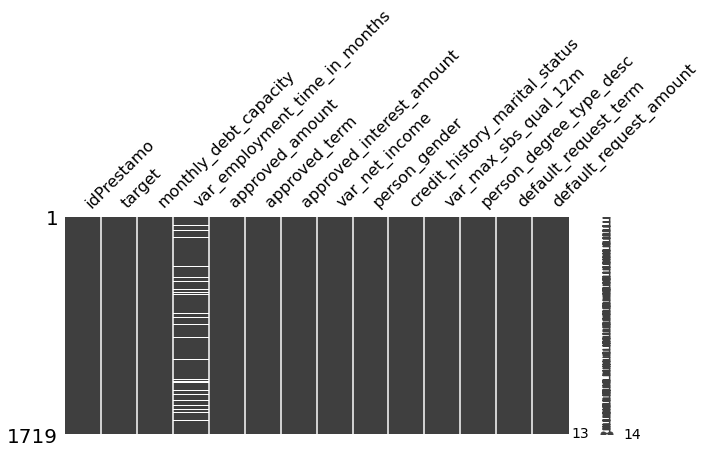

In [7]:
msno.matrix(df, figsize=(10,4));

In [1]:
msno.bar(df) 

NameError: ignored

Obtenemos la cantidad exacta de valores nulos en el dataframe, podemos concluir que la proporción de datos nulos es bastante ***reducida***.

In [ ]:
df.isna().sum()

idPrestamo                         0
target                             0
monthly_debt_capacity              0
var_employment_time_in_months    200
approved_amount                    0
approved_term                      0
approved_interest_amount           0
var_net_income                     0
person_gender                      0
credit_history_marital_status      0
var_max_sbs_qual_12m               0
person_degree_type_desc            0
default_request_term               0
default_request_amount             0
dtype: int64

## 1.3 Atributos

A continuación, podemos observar la lista de atributos del dataset, junto con su tipo de dato. Además, podemos determinar el conjunto de atributos que podrían aportar valor significativo a nuestro modelo y aquellos que no.



In [ ]:
df.dtypes

idPrestamo                        object
target                             int64
monthly_debt_capacity             object
var_employment_time_in_months    float64
approved_amount                   object
approved_term                      int64
approved_interest_amount          object
var_net_income                   float64
person_gender                     object
credit_history_marital_status     object
var_max_sbs_qual_12m              object
person_degree_type_desc           object
default_request_term               int64
default_request_amount             int64
dtype: object

In [ ]:
df.describe()

,target,var_employment_time_in_months,approved_term,var_net_income,default_request_term,default_request_amount
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.0
mean,0.295521,33.979592,6.464805,2693.545884,0.507853,0.0
std,0.456409,26.889423,3.009842,1825.694773,0.500084,0.0
min,0.000000,-1.000000,1.000000,0.000000,0.000000,0.0
25%,0.000000,11.000000,6.000000,1750.000000,0.000000,0.0
50%,0.000000,26.000000,6.000000,2373.758333,1.000000,0.0
75%,1.000000,61.000000,6.000000,3075.133333,1.000000,0.0
max,1.000000,87.000000,12.000000,28587.000000,1.000000,0.0


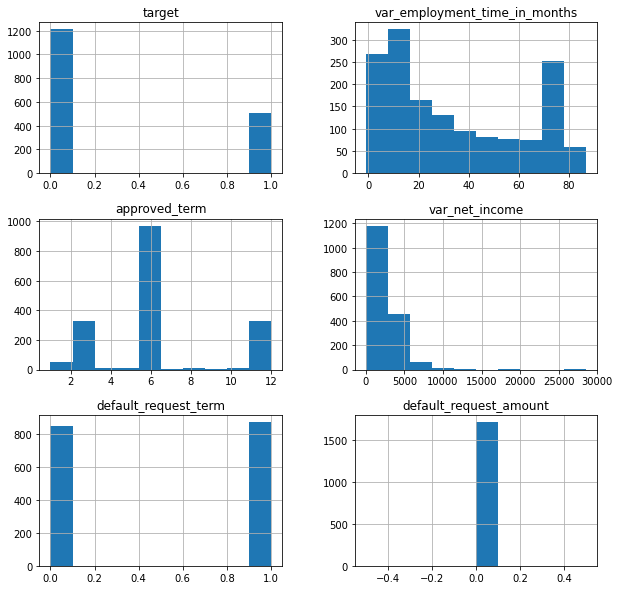

In [ ]:
df.hist(figsize=(10,10));

### 1.3.1 Descartando atributos

Luego del análisis de variables, podemos descartar algunas que no aportarían valor a nuestro modelo. Estas son:

1.   **idPrestamo**: Identificador de Préstamo
2.   **person_gender**: Género de la persona que solicito el préstamo
3. **default_request_amount**: Si escogio el monto de dinero ofrecido (según muestra el histograma anterior, todos los valores son 0)


In [ ]:
df = df.drop(["idPrestamo", "person_gender", "default_request_amount"], axis=1)
df.tail(20)

,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term
1699,0,543.61,57.0,"1,500",6,221.53,2174.433333,S,NORMAL,Universitaria,1
1700,1,300.33,10.0,"1,400",6,207.69,1414.000000,S,NORMAL,Carrera T���cnica,1
1701,0,230.76,8.0,600,3,80.13,1050.000000,S,NORMAL,Carrera T���cnica,0
1702,1,"1,214.79",6.0,"3,000",6,429.99,5346.058333,S,NORMAL,Universitaria,1
1703,0,211.15,72.0,"1,900",12,545.27,1649.375000,S,NORMAL,Universitaria,0
1704,0,250.7,27.0,"1,200",6,289.11,1312.500000,S,NORMAL,Universitaria,1
1705,1,506.06,19.0,"1,500",6,281.39,2382.356667,S,NORMAL,Carrera T���cnica,1
1706,0,225,2.0,"1,000",6,152.32,6553.805000,C,NORMAL,Carrera T���cnica,1
1707,1,479.29,82.0,"1,000",3,91.9,2082.500000,S,NORMAL,Secundaria,1
1708,0,377.84,43.0,"1,900",6,356.42,1575.000000,S,CPP,Universitaria,0


In [ ]:
print('Nueva cantidad de atributos:',df.shape[1])
print(df.dtypes)

Nueva cantidad de atributos: 11
target                             int64
monthly_debt_capacity             object
var_employment_time_in_months    float64
approved_amount                   object
approved_term                      int64
approved_interest_amount          object
var_net_income                   float64
credit_history_marital_status     object
var_max_sbs_qual_12m              object
person_degree_type_desc           object
default_request_term               int64
dtype: object


## 1.4 Atributo Clase
 

En el siguiente gráfico podemos observar la proporción de instancias del atributo clase del dataset (***target***)

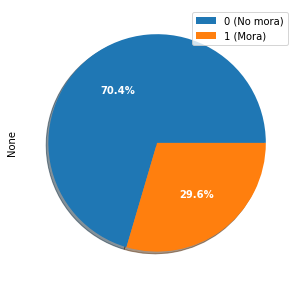

In [ ]:
df.groupby(['target']).size().plot(kind='pie', legend=True, figsize = (5,5), labels=['0 (No mora)', '1 (Mora)'], autopct='%1.1f%%', shadow=True, textprops={'color':"w", 'weight':"bold"});

## 2.0 Tratamiento de Datos

La función sklearn.impute.SimpleImputer permite sustituir valores nulos por otros valores según varias estrategias disponibles. La estrategia a ejecutar se indica mediante el parámetro strategy.

En este caso el atributo var_employment_time_in_months tenia valores NA la estrategia es sustituir los valores nulos por el valor medio de las características



In [ ]:
from sklearn.impute import SimpleImputer
dcv = df
si = SimpleImputer()

dcv["var_employment_time_in_months"] = si.fit_transform(dcv["var_employment_time_in_months"].values.reshape(-1, 1))

#dcv.head(11)
dcv.describe()



,target,var_employment_time_in_months,approved_term,var_net_income,default_request_term
count,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,0.295521,33.979592,6.464805,2693.545884,0.507853
std,0.456409,25.275851,3.009842,1825.694773,0.500084
min,0.000000,-1.000000,1.000000,0.000000,0.000000
25%,0.000000,12.000000,6.000000,1750.000000,0.000000
50%,0.000000,33.000000,6.000000,2373.758333,1.000000
75%,1.000000,55.000000,6.000000,3075.133333,1.000000
max,1.000000,87.000000,12.000000,28587.000000,1.000000
